In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')


In [342]:
df = pd.read_csv('../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset_enriched.csv')
print(df.shape)
print(df.columns)

(233460, 11)
Index(['Unnamed: 0', 'id', 'text', 'generated', 'punctuations_nb',
       'neg_sentiment_polarity', 'pos_sentiment_polarity',
       'text_corrections_nb', 'text_repetitions_nb', 'number_of_sentences',
       'text_lenght'],
      dtype='object')


In [343]:
df['repetitions_ratio'] = df['text_repetitions_nb']/df['text_lenght']
df['punctuations_ratio'] = df['punctuations_nb']/df['text_lenght']
df['text_corrections_ratio'] = df['text_corrections_nb']/df['text_lenght']
df['text_corrections_set_ratio'] = df['text_corrections_nb']/df['number_of_sentences']
df['average_neg_sentiment_polarity'] = df['neg_sentiment_polarity']/df['text_lenght']

<Axes: xlabel='generated', ylabel='text_corrections_ratio'>

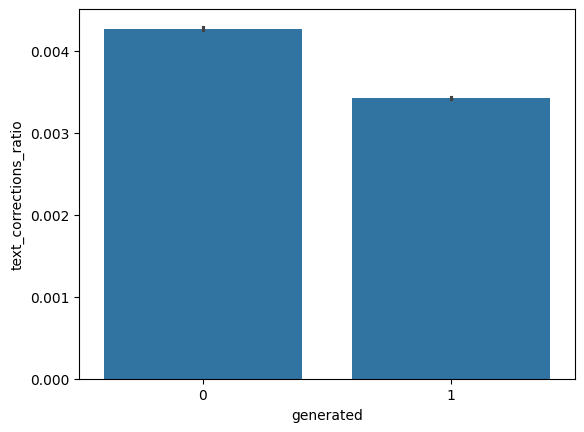

In [344]:
sns.barplot(data=df, x="generated", y="text_corrections_ratio")

In [250]:
from detect_ai_content.ml_logic.for_texts.using_ml_features.using_sentences_decomposition import *

df_preprocessed = preprocess(data=df, execute_enrich=False)
df_preprocessed.shape

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package words is already up-to-date!
/Users/jeromemorissard/.pyenv/versions/3.10.6/envs/detect_ai_content/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [34]:
df_preprocessed

array([[-0.5       ,  0.        ,  0.95230769,  0.        , -0.97333333],
       [-0.5       , -0.08      , -0.39769231,  1.        , -0.21333333],
       [-0.5       ,  0.        , -0.39769231,  2.        ,  0.24      ],
       ...,
       [ 0.        , -0.1       , -0.39769231,  0.        , -0.53333333],
       [ 1.5       ,  0.        ,  0.64412587,  0.        ,  0.57333333],
       [-0.5       ,  0.        ,  1.40230769,  1.        , -0.69333333]])

In [35]:
model = train_LogisticRegression_model(X_train_processed=df_preprocessed, y_train=df['generated'])

# model_path = '../../detect_ai_content/models/leverdewagon/sequences_logit.pickle'
# pickle.dump(model, open(model_path, 'wb'))

In [36]:
text = "The youngers student needs the olders student like the olders student need a adult to they can say dont do this is the same the younger. student need the olders student they can help each others. If the youngers studetn have a promble or a question they can ask the olders student. To do right this some student of the youngers schools they dont know english the olders studen. Can help them some times the olders student needs the youngerts students to do somenthing like if the olders sstudent dont know somenthing they can."
sentences_df = to_sentences(pd.DataFrame(data={'text':[text]}), include_generated=False)
sentences_preprocessed_df = preprocess(sentences_df)
preds = model.predict(X=sentences_preprocessed_df)

START:The youngers student needs the olders student like the olders student need a adult to they can say dont do this is the same the younger.:END
START:student need the olders student they can help each others.:END
START:If the youngers studetn have a promble or a question they can ask the olders student.:END
START:To do right this some student of the youngers schools they dont know english the olders studen.:END
START:Can help them some times the olders student needs the youngerts students to do somenthing like if the olders sstudent dont know somenthing they can.:END
_number_of_corrections_using_Spacy: The youngers student needs the olders student like the olders student need a adult to they can say dont do this is the same the younger.
_number_of_corrections_using_Spacy: student need the olders student they can help each others.
_number_of_corrections_using_Spacy: If the youngers studetn have a promble or a question they can ask the olders student.
_number_of_corrections_using_Spac

In [37]:
preds

array([0, 0, 0, 0, 0])

In [345]:
AI_Human_enriched_df = pd.read_csv('../../raw_data/kaggle-ai-generated-vs-human-text/AI_Human_enriched.csv')
AI_Human_enriched_df.generated.value_counts()

generated
0.0    187663
1.0    117473
Name: count, dtype: int64

In [252]:
AI_Human_enriched_df.columns

Index(['Unnamed: 0', 'text', 'generated', 'punctuations_nb',
       'neg_sentiment_polarity', 'pos_sentiment_polarity',
       'text_corrections_nb', 'text_repetitions_nb', 'number_of_sentences',
       'text_lenght'],
      dtype='object')

In [346]:
AI_Human_enriched_df['repetitions_ratio'] = AI_Human_enriched_df['text_repetitions_nb']/AI_Human_enriched_df['text_lenght']
AI_Human_enriched_df['punctuations_ratio'] = AI_Human_enriched_df['punctuations_nb']/AI_Human_enriched_df['text_lenght']
AI_Human_enriched_df['text_corrections_ratio'] = AI_Human_enriched_df['text_corrections_nb']/AI_Human_enriched_df['text_lenght']
AI_Human_enriched_df['text_corrections_set_ratio'] = AI_Human_enriched_df['text_corrections_nb']/AI_Human_enriched_df['number_of_sentences']
AI_Human_enriched_df['average_sentence_lenght'] = AI_Human_enriched_df['text_lenght']/AI_Human_enriched_df['number_of_sentences']
AI_Human_enriched_df['average_neg_sentiment_polarity'] = AI_Human_enriched_df['neg_sentiment_polarity']/AI_Human_enriched_df['text_lenght']

<Axes: xlabel='generated', ylabel='average_neg_sentiment_polarity'>

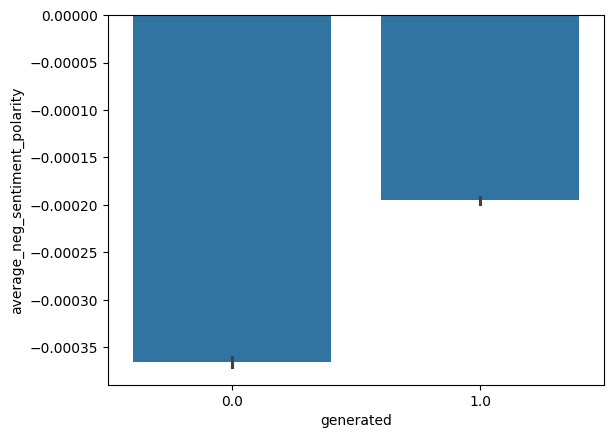

In [254]:
sns.barplot(data=AI_Human_enriched_df, x="generated", y="average_neg_sentiment_polarity")

In [347]:
daigt_v2_enriched_df = pd.read_csv('../../raw_data/daigt-v2-train-dataset/train_v2_drcat_02_enriched.csv')
daigt_v2_enriched_df['repetitions_ratio'] = daigt_v2_enriched_df['text_repetitions_nb']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['punctuations_ratio'] = daigt_v2_enriched_df['punctuations_nb']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['text_corrections_ratio'] = daigt_v2_enriched_df['text_corrections_nb']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['text_corrections_set_ratio'] = daigt_v2_enriched_df['text_corrections_nb']/daigt_v2_enriched_df['number_of_sentences']
daigt_v2_enriched_df['average_neg_sentiment_polarity'] = daigt_v2_enriched_df['neg_sentiment_polarity']/daigt_v2_enriched_df['text_lenght']
daigt_v2_enriched_df['repetitions_ratio'].mean()

np.float64(0.053504115447872404)

In [370]:
# big_df = pd.concat(objs=[df, daigt_v2_enriched_df, AI_Human_enriched_df])
big_df = pd.concat(objs=[df, AI_Human_enriched_df, daigt_v2_enriched_df])
big_df = big_df[np.isinf(big_df['average_sentence_lenght']) == False]

In [372]:
big_df.generated.value_counts()

generated
0.0    304393
1.0    279067
Name: count, dtype: int64

In [147]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report


In [ ]:
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

X = big_df['text']
y = big_df['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

results = cross_validate(estimator=pipeline_naive_bayes, X=X, y=y, cv=5)
print(results['test_score'].mean())

# print(classification_report(y_test,y_pred))

In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

pipeline_linear_regression = make_pipeline(
    RobustScaler(),
    LogisticRegression()
)

big_df['repetitions_ratio'] = big_df['text_repetitions_nb']/big_df['text_lenght']
big_df['punctuations_ratio'] = big_df['punctuations_nb']/big_df['text_lenght']
big_df['text_corrections_ratio'] = big_df['text_corrections_nb']/big_df['text_lenght']
big_df['average_sentence_lenght'] = big_df['text_lenght']/big_df['number_of_sentences']
big_df['average_neg_sentiment_polarity'] = big_df['neg_sentiment_polarity']/big_df['text_lenght']

X = big_df[[
    'repetitions_ratio',
    'punctuations_ratio',
    'text_corrections_ratio',
    'average_sentence_lenght',
    'average_neg_sentiment_polarity',
]]
print(X.shape)
y = big_df['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

results = cross_validate(estimator=pipeline_linear_regression, X=X, y=y, cv=5)
print(results['test_score'].mean())

(583460, 5)
(466768, 5)
(116692, 5)
0.7088883556713399


In [259]:
big_df.drop(columns=['id', 'text', 'Unnamed: 0']).corr()

,generated,punctuations_nb,neg_sentiment_polarity,pos_sentiment_polarity,text_corrections_nb,text_repetitions_nb,number_of_sentences,text_lenght,repetitions_ratio,punctuations_ratio,text_corrections_ratio,text_corrections_set_ratio,average_neg_sentiment_polarity,average_sentence_lenght
generated,1.000000,-0.088503,0.188044,-0.205674,-0.247763,-0.341117,-0.173756,-0.230693,-0.423831,0.128489,-0.215961,-0.204748,0.125051,-0.118654
punctuations_nb,-0.088503,1.000000,-0.405242,0.534757,0.521038,0.728464,0.812903,0.777696,0.398635,0.544887,0.201195,0.008654,-0.131355,-0.150357
neg_sentiment_polarity,0.188044,-0.405242,1.000000,-0.217903,-0.271814,-0.403803,-0.545572,-0.372813,-0.309147,-0.171821,-0.136490,0.036388,0.857965,0.189010
pos_sentiment_polarity,-0.205674,0.534757,-0.217903,1.000000,0.244505,0.621327,0.715968,0.581323,0.446096,0.134036,0.015978,-0.118340,-0.005858,-0.233024
text_corrections_nb,-0.247763,0.521038,-0.271814,0.244505,1.000000,0.454690,0.411738,0.471582,0.280088,0.225090,0.814804,0.526937,-0.116500,0.063099
text_repetitions_nb,-0.341117,0.728464,-0.403803,0.621327,0.454690,1.000000,0.774497,0.911819,0.719688,0.052412,0.082980,0.074302,-0.091358,0.025737
number_of_sentences,-0.173756,0.812903,-0.545572,0.715968,0.411738,0.774497,1.000000,0.775252,0.503574,0.296628,0.107349,-0.128366,-0.260179,-0.323884
text_lenght,-0.230693,0.777696,-0.372813,0.581323,0.471582,0.911819,0.775252,1.000000,0.438700,0.022393,0.052447,0.073616,-0.031658,0.079297
repetitions_ratio,-0.423831,0.398635,-0.309147,0.446096,0.280088,0.719688,0.503574,0.438700,1.000000,0.107060,0.157606,0.071756,-0.190250,-0.065630
punctuations_ratio,0.128489,0.544887,-0.171821,0.134036,0.225090,0.052412,0.296628,0.022393,0.107060,1.000000,0.270104,-0.051620,-0.183252,-0.288985


In [302]:
%%time

# TExt cleaning
# https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing

# algo to detect spelling mistakes
#

from nltk.corpus import words
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet
wordnet_words = list(wordnet.words())
print(wordnet_words[:10])  # Affiche les 10 premiers mots de WordNet

from nltk.stem import *
# stemmer = PorterStemmer()
stemmer = SnowballStemmer("english")

from textblob import TextBlob

text = """
        Also they feel more comfortable at home. Some school have decreased bullying and high and middle school because some students get bullied. Some Schools offter distance learning as an option for students to attend classes from home by way of online or video conferencing. Students can ncreased to learn at home. Also is more hard to students understand by online. students get distract at home. Some schools in United States ofter classes from home because is good option to students . Also students can stay more relaxing from home. Students don't want to go more at school and they want to get classes at home. Students get fall in environment learning. But students can get relaxing at home.

Students can get distract at home because they have easy to use phones. If students sleep in class they want to sleep at home too. They feel more bored at home because they need stay at home more time. Also students don't do anything at home because if they stay at home is esay to get more distract. Students can get fall in environment learning and is hard they learn at home. Students have more time to do homework. Also they don't want to learn by online. Also many students have hard time in class to understand that teacher explain in more hard they learn at home.

Some schools affter classes from home because they think is good option to students. If they get classes at home they don't learning. Many students work and they would tired and they don't want to learn.

Students don't pay attention in class they too don't pay attention at home because is more hard. But students get more distract stay near the family and they don't want to pay attention.

Conclude if students get classes from home by online they don't want to pay attention because is more easy they get distract. Students feel more pressure at home. Also they want to play or use phone and not is good option to students get class at home they get distration and decrease to learning. Also students get frustration in class because they don't understand but if they get classes in online they don't learning too because is more hard they learning from home.. Also they want to listening to music or play.

Students fall in environment learning because they learn at class when the teacher explain if students attend classes from home by online is hard they learn. Also student sleep more and stay with more energy to receive the class by online. Also they feel safe at home with their family"
"""

text_ai = """
Therefore, when it comes to allowing students the option to attend classes from home, there are intricacies that need to be taken into consideration in order to ensure that the best decision is made. Ultimately, this decision will depend on the individual student and their ability to take advantage of the opportunities available to them..

However, in the end, the effect that home-based classes will have on learning is largely dependent on the situation of the student. On the other hand, there could be a lack of social interaction with classmates, a lack of guidance from instructors, and potential technical issues as well. For example, those who are already motivated to learn and are self-disciplined may reap the full benefits of studying in the comfort of their own home. Conversely, for those who require more interaction and guidance that comes with physical classrooms, a home-based learning style may not be as effective. On the one hand, it eliminates the need for physical attendance to classrooms, reduces the psychology of peer pressure, and eliminates potential health risks resulting from attending crowded places. In addition, students have the opportunity to arrange their learning environment according to their preferences and better manage their own time.
When considering the pros and cons of attending classes from home, there is no doubt that there are a variety of advantages and disadvantages
"""
words_dict = {}
for w in words.words():
    words_dict[w]=w

for w in list(wordnet_words):
    words_dict[w]=w

words_set = set(words_dict.values())


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['.22-caliber', '.22-calibre', '.22_caliber', '.22_calibre', '.38-caliber', '.38-calibre', '.38_caliber', '.38_calibre', '.45-caliber', '.45-calibre']
CPU times: user 377 ms, sys: 60.7 ms, total: 438 ms
Wall time: 471 ms


In [309]:
%%time

from nltk.tokenize import TweetTokenizer, sent_tokenize
from textblob import Word

tokenizer_words = TweetTokenizer()
tokens_sentences = []
tokens_sentences = [tokenizer_words.tokenize(t) for t in nltk.sent_tokenize(text_ai)]
# print(tokens_sentences)
corrections = 0
for sentence in tokens_sentences:
    for word in sentence:
        word_lower = str.lower(word)
        if word_lower not in words_dict:
            if len(word) > 1:
                if stemmer.stem(word_lower) not in words_dict:
                    singular_form = Word(word_lower).singularize()
                    if singular_form not in words_dict:
                        print(f'❌ {word_lower} - sing({singular_form})')
                        corrections+= 1
                # if stemmer.stem(word_lower) not in words_dict:
                    # print(f'❌ {word_lower} - stem({stemmer.stem(word_lower)})')
                    # corrections+= 1

print(corrections)

❌ .. - sing(..)
❌ home-based - sing(home-based)
❌ home-based - sing(home-based)
3
CPU times: user 6.54 ms, sys: 2.8 ms, total: 9.34 ms
Wall time: 8.59 ms


In [316]:
%%time

text_blob = TextBlob(text)
corrections = 0
ignore_words = [
    'n\'t'
]
for sentence in text_blob.sentences:
    for word in sentence.words:
        if len(word) > 2 and word not in ignore_words:
            word_lower = str.lower(word)
            if stemmer.stem(word_lower) not in words_dict:
                singular_form = Word(word_lower).singularize()
                if singular_form not in words_dict:
                    print(f'❌ {word_lower} - sing({singular_form})')
                    corrections+= 1
#         else:
#            print(f'✅ {word_lower}')

print(corrections)

❌ bullied - sing(bullied)
❌ offter - sing(offter)
❌ conferencing - sing(conferencing)
❌ ncreased - sing(ncreased)
❌ esay - sing(esay)
❌ affter - sing(affter)
❌ distration - sing(distration)
7
CPU times: user 21.8 ms, sys: 815 μs, total: 22.7 ms
Wall time: 24.3 ms


In [283]:
from spellchecker import SpellChecker
spell = SpellChecker()

def compute_number_of_text_corrections_using_pyspellchecker(text):
    text_blob = TextBlob(text)
    corrections = 0
    for sentence in text_blob.sentences:
        for word in sentence.words:
            correction = spell.correction(word)
            if correction != word:
                print(f'❌ {word} -> {correction}')
                corrections += 1

    return corrections

In [284]:
%%time

corrections = compute_number_of_text_corrections_using_pyspellchecker(text)
print(corrections)

❌ offter -> offer
❌ ncreased -> increased
❌ ofter -> after
❌ n't -> not
❌ n't -> not
❌ esay -> say
❌ n't -> not
❌ affter -> after
❌ n't -> not
❌ n't -> not
❌ n't -> not
❌ n't -> not
❌ n't -> not
❌ n't -> not
❌ distration -> distraction
❌ n't -> not
❌ n't -> not
17
CPU times: user 28.6 ms, sys: 3.86 ms, total: 32.5 ms
Wall time: 35.8 ms


In [336]:
enriched_df = pd.read_csv('../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset_enriched.csv')
print(df.columns)

enriched_v2_df = pd.read_csv('../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset_enriched_v2.csv')


Index(['Unnamed: 0', 'id', 'text', 'generated', 'punctuations_nb',
       'neg_sentiment_polarity', 'pos_sentiment_polarity',
       'text_corrections_nb', 'text_repetitions_nb', 'number_of_sentences',
       'text_lenght', 'repetitions_ratio', 'punctuations_ratio',
       'text_corrections_ratio', 'text_corrections_set_ratio',
       'average_neg_sentiment_polarity'],
      dtype='object')


In [337]:
reduced_enriched_v2_df = enriched_v2_df[['id', 'text_corrections_nb']]
reduced_enriched_v2_df = reduced_enriched_v2_df.rename(columns={'text_corrections_nb':'text_corrections_nb_v2'})

In [340]:
merge_enriched_df = pd.merge(left=enriched_df, right=reduced_enriched_v2_df, left_on="id", right_on="id")
print(merge_enriched_df.shape)
merge_enriched_df[merge_enriched_df["generated"] == 1]

(80, 12)


,Unnamed: 0,id,text,generated,punctuations_nb,neg_sentiment_polarity,pos_sentiment_polarity,text_corrections_nb,text_repetitions_nb,number_of_sentences,text_lenght,text_corrections_nb_v2
20,0,cc902a20-27c4-4c18-8012-048a328206d1,"\n\nTherefore, when it comes to allowing stude...",1,28,-0.022917,2.739286,3,43,9,1427,7
21,0,cc902a20-27c4-4c18-8012-048a328206d1,"\n\nTherefore, when it comes to allowing stude...",1,28,-0.022917,2.739286,3,43,9,1427,3
22,1,c4d2fbe3-e966-479d-89c4-62e1729b6255,It is important to weigh both the potential co...,1,26,-0.023214,0.333333,5,37,8,1168,21
23,1,c4d2fbe3-e966-479d-89c4-62e1729b6255,It is important to weigh both the potential co...,1,26,-0.023214,0.333333,5,37,8,1168,5
24,2,710f585e-5e98-42b8-81f6-265d7c934645,To ensure that parents are comfortable with th...,1,9,0.000000,0.826190,0,10,4,644,18
25,2,710f585e-5e98-42b8-81f6-265d7c934645,To ensure that parents are comfortable with th...,1,9,0.000000,0.826190,0,10,4,644,1
26,3,e4db6c43-7b6b-4385-9b67-04652c71df0c,"As Emerson said, by going confidently in the d...",1,27,-0.197917,3.412753,7,41,11,1291,7
27,3,e4db6c43-7b6b-4385-9b67-04652c71df0c,"As Emerson said, by going confidently in the d...",1,27,-0.197917,3.412753,7,41,11,1291,6
28,4,7a48bcf1-cbb4-4f41-b99a-ea859c56afdf,"Parents, for example, can have a major influen...",1,25,-0.050000,1.509546,5,34,6,1091,2
29,4,7a48bcf1-cbb4-4f41-b99a-ea859c56afdf,"Parents, for example, can have a major influen...",1,25,-0.050000,1.509546,5,34,6,1091,1


In [296]:
merge_enriched_df[merge_enriched_df['id'] == 'cc902a20-27c4-4c18-8012-048a328206d1'].to_csv('temp.csv')

In [2]:
# entropy?
# perplexity?


ModuleNotFoundError: No module named 'nltk.model'